In [151]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
pd.set_option('display.max_columns', None)

### Считывание датафрейма

In [153]:
df = pd.read_csv("LoansData.csv")
df.head()

/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_31542/182757288.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("LoansData.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df.shape

(887379, 72)

### Доля заявок разных типов %

In [155]:
100*df.application_type.value_counts()/df.application_type.shape[0]

application_type
INDIVIDUAL    99.942415
JOINT          0.057585
Name: count, dtype: float64

In [156]:
joint_df = df[df.application_type == "JOINT"]
individual_df = df[df.application_type == "INDIVIDUAL"]

In [157]:
df = individual_df

### Deleting semi-empty columns

In [158]:
sorted(df.isnull().sum() / len(df))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.510254062611347e-06,
 3.2699341953932265e-05,
 3.2699341953932265e-05,
 3.2699341953932265e-05,
 3.2699341953932265e-05,
 3.2699341953932265e-05,
 3.2699341953932265e-05,
 3.2699341953932265e-05,
 0.0001623691462540085,
 0.00016349670976966132,
 0.000566036884857724,
 0.019756040357753354,
 0.05047425321468358,
 0.05795789226807146,
 0.07924065362601876,
 0.07924065362601876,
 0.07924065362601876,
 0.2852397425546981,
 0.5120040411876401,
 0.7501815377260201,
 0.8455948348570475,
 0.8578976803763356,
 0.976085505396519,
 0.976085505396519,
 0.976085505396519,
 0.976085505396519,
 0.976085505396519,
 0.976085505396519,
 0.976085505396519,
 0.976085505396519,
 0.976085505396519,
 0.976085505396519,
 0.976085505396519,
 0.976085505396519,
 0.9767180685288003,
 0.9791671364847981,
 1.0,

In [159]:
df = df.loc[:, df.isnull().mean() <= 0.2]

In [160]:
cols = ["grade", "home_ownership", "verification_status", "pymnt_plan"]

In [161]:
for col in cols:
    print(col, df[col].nunique())

grade 7
home_ownership 6
verification_status 3
pymnt_plan 2


In [162]:
def validate_dist(ser:pd.Series):
    units = ser.value_counts()
    for unit in units:
        if unit/units.sum() > 0.8:
            return True
    return False

In [163]:
for column in df.columns:
    if df[column].nunique() < 10 and validate_dist(df[column]):
        print(column)
        del df[column]

pymnt_plan
policy_code
application_type
acc_now_delinq


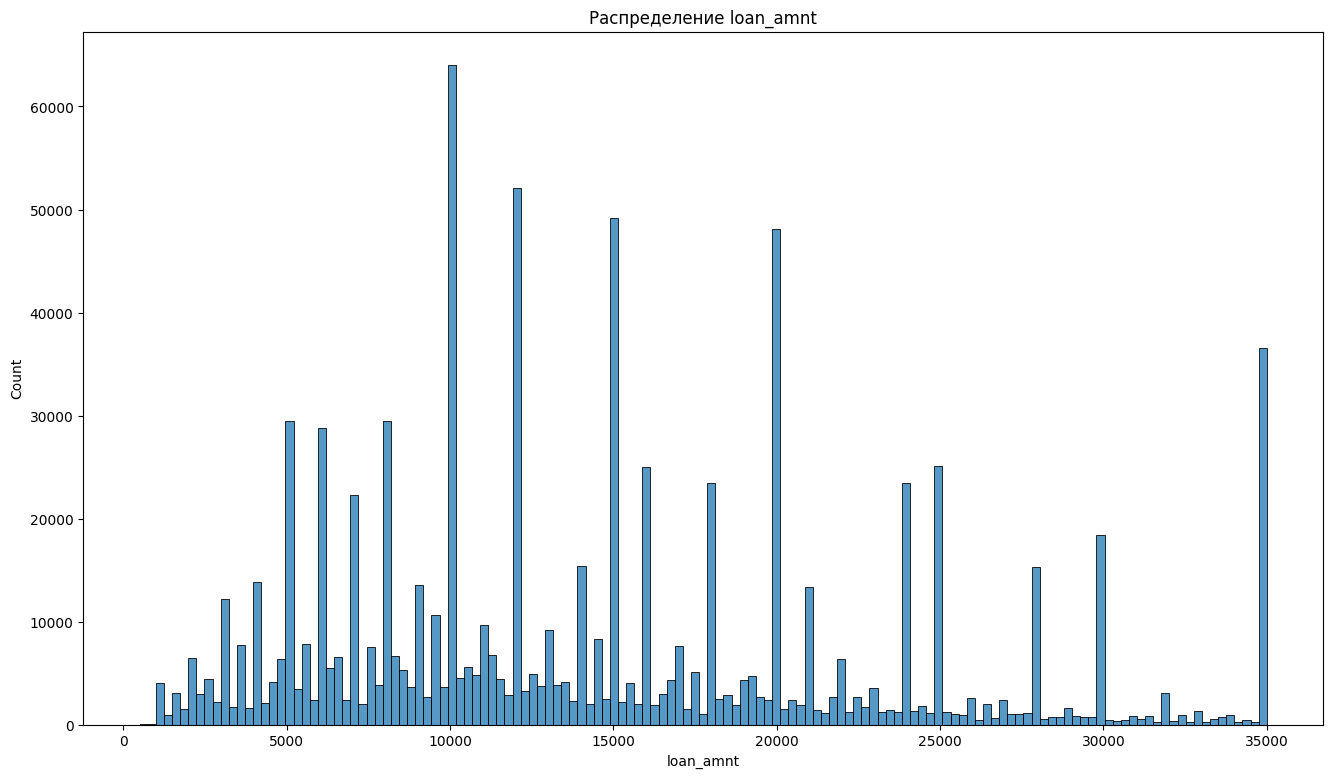

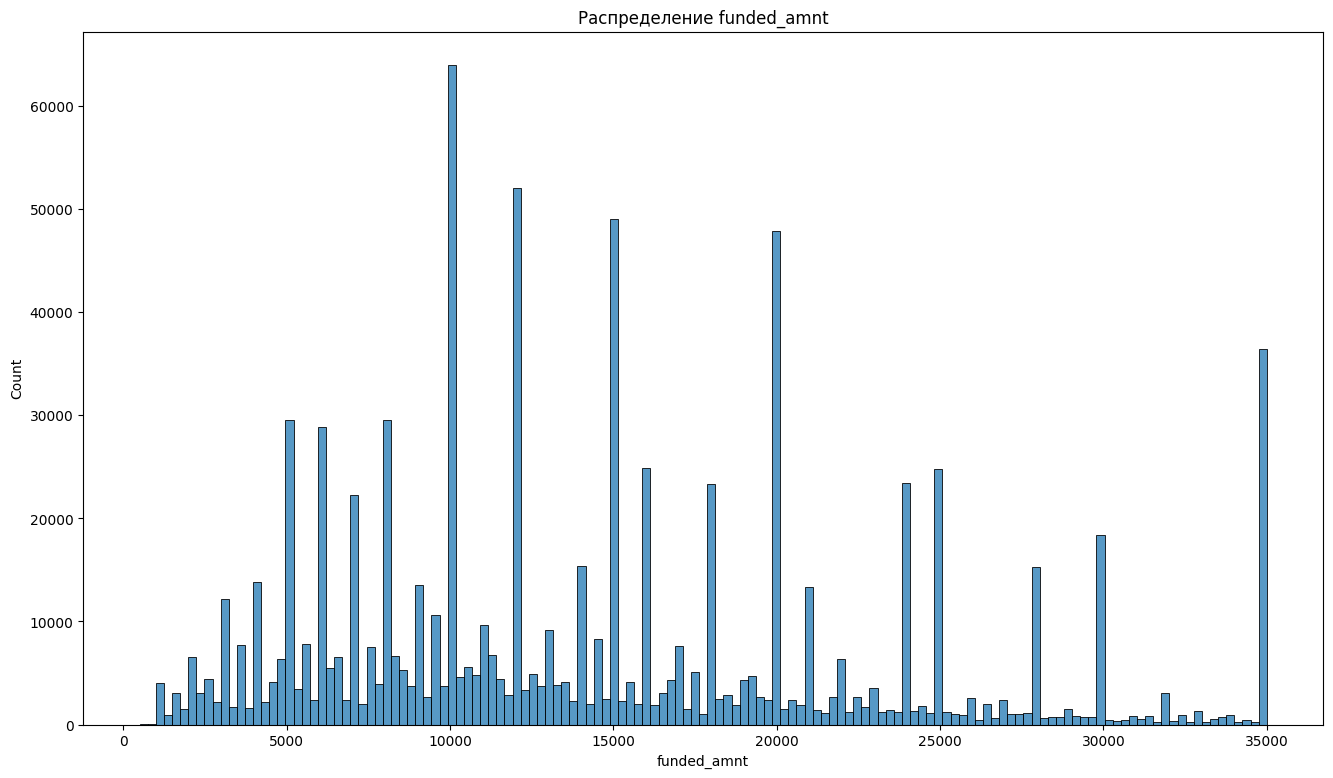

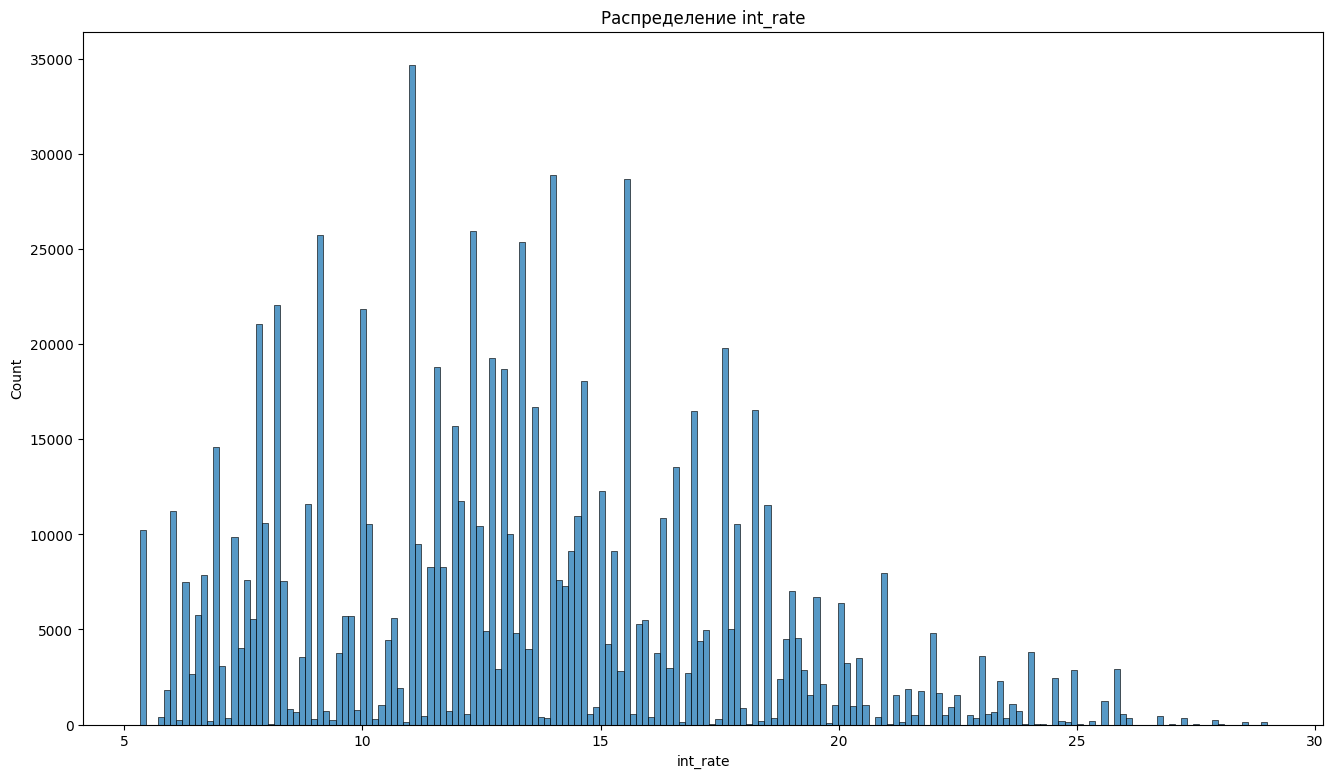

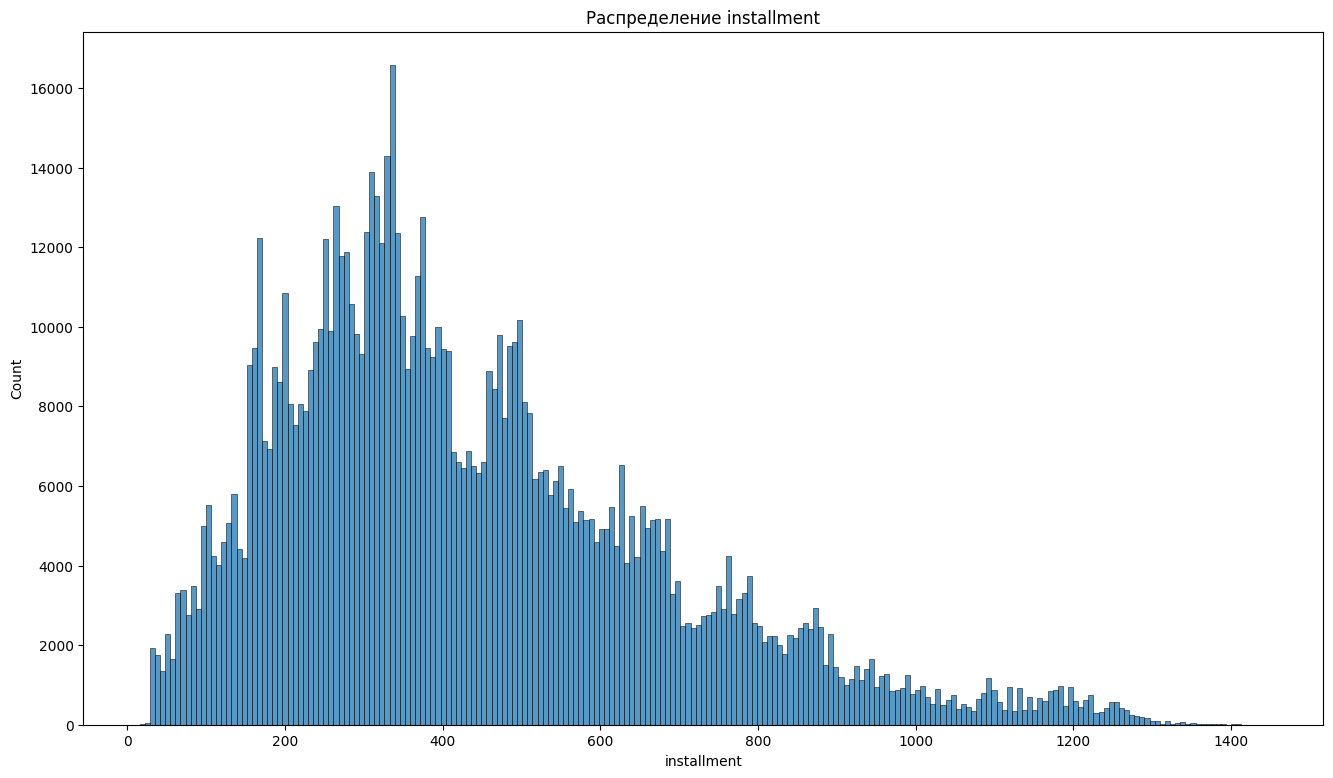

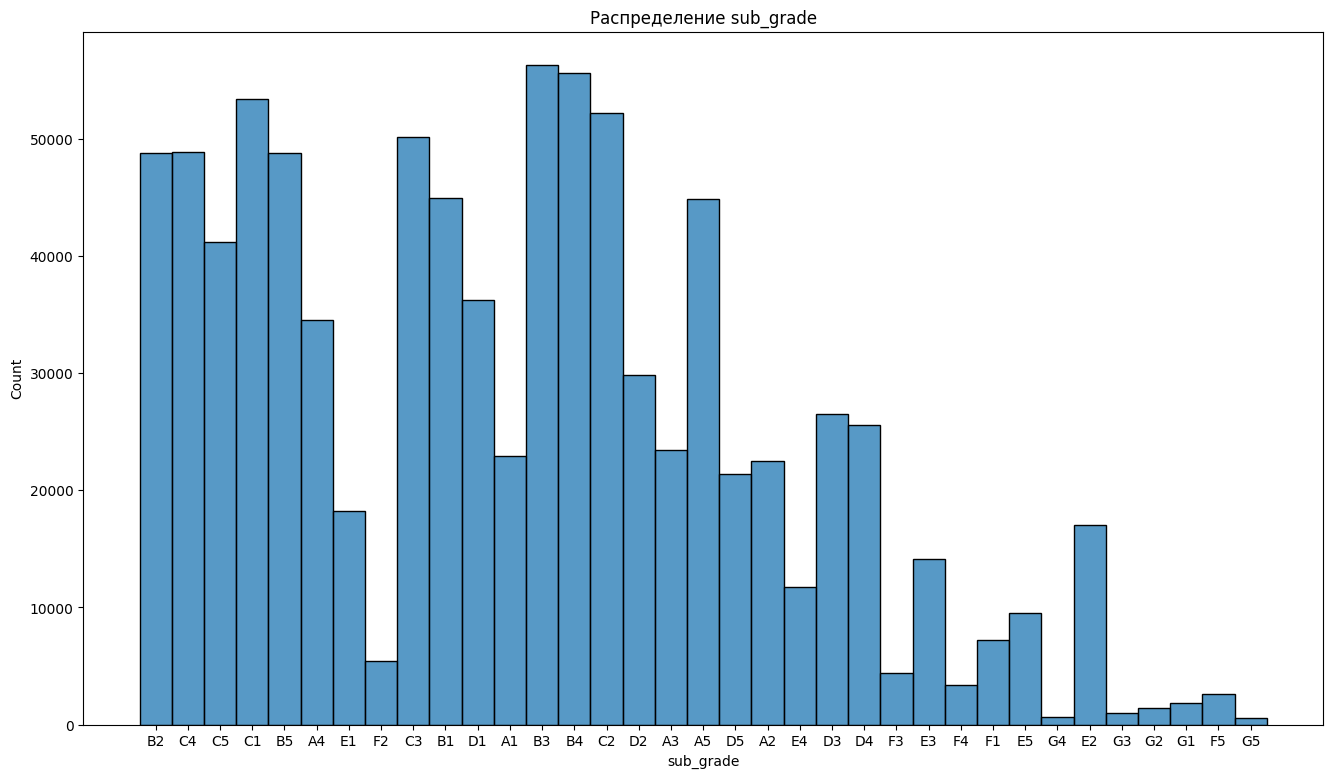

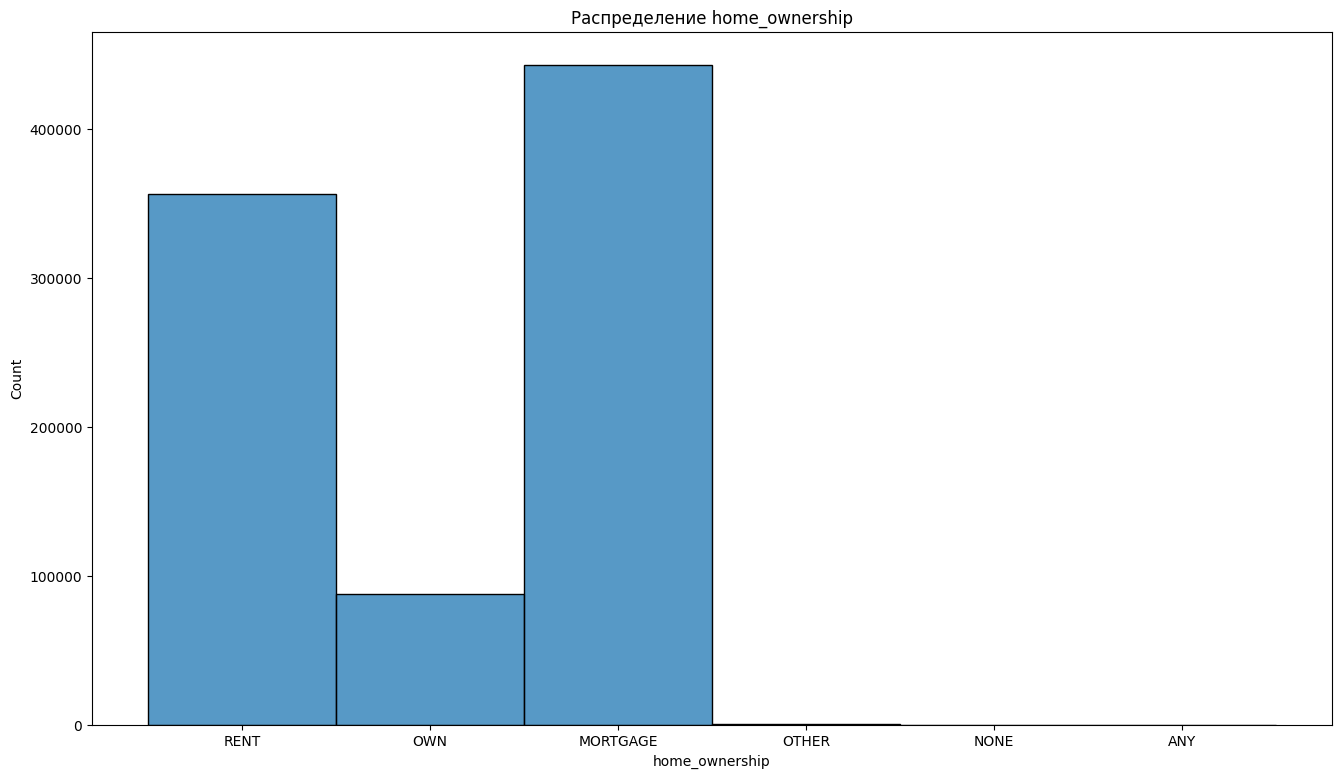

In [164]:
cols = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'sub_grade', 'home_ownership']
for col in cols:
    plt.figure(figsize=(16, 9))
    sns.histplot(data=df, x=col)
    plt.title(f'Распределение {col}')
    plt.show()

In [165]:
df.loan_amnt.describe()

count    886868.000000
mean      14752.593452
std        8434.363707
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [166]:
df.loan_amnt.median()

np.float64(13000.0)

<Axes: xlabel='loan_amnt'>

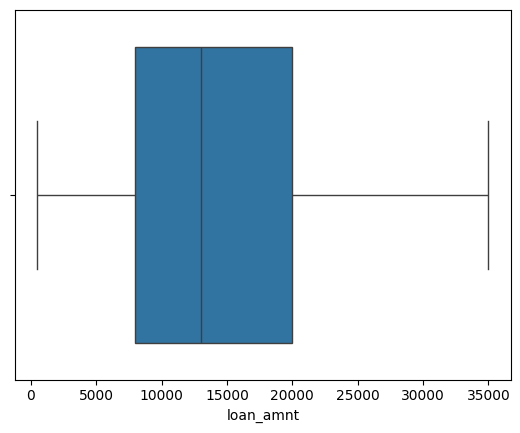

In [167]:
sns.boxplot(df, x='loan_amnt')

# Вывод

- Распределение довольно шумное
- Похоже на экспоненциальное распределение
- Медиана близка к среднему значению
- В данных есть выбросы, но они гомогенны
- Такие данные можно пытаться предсказывать с помощью модели машинного обучения


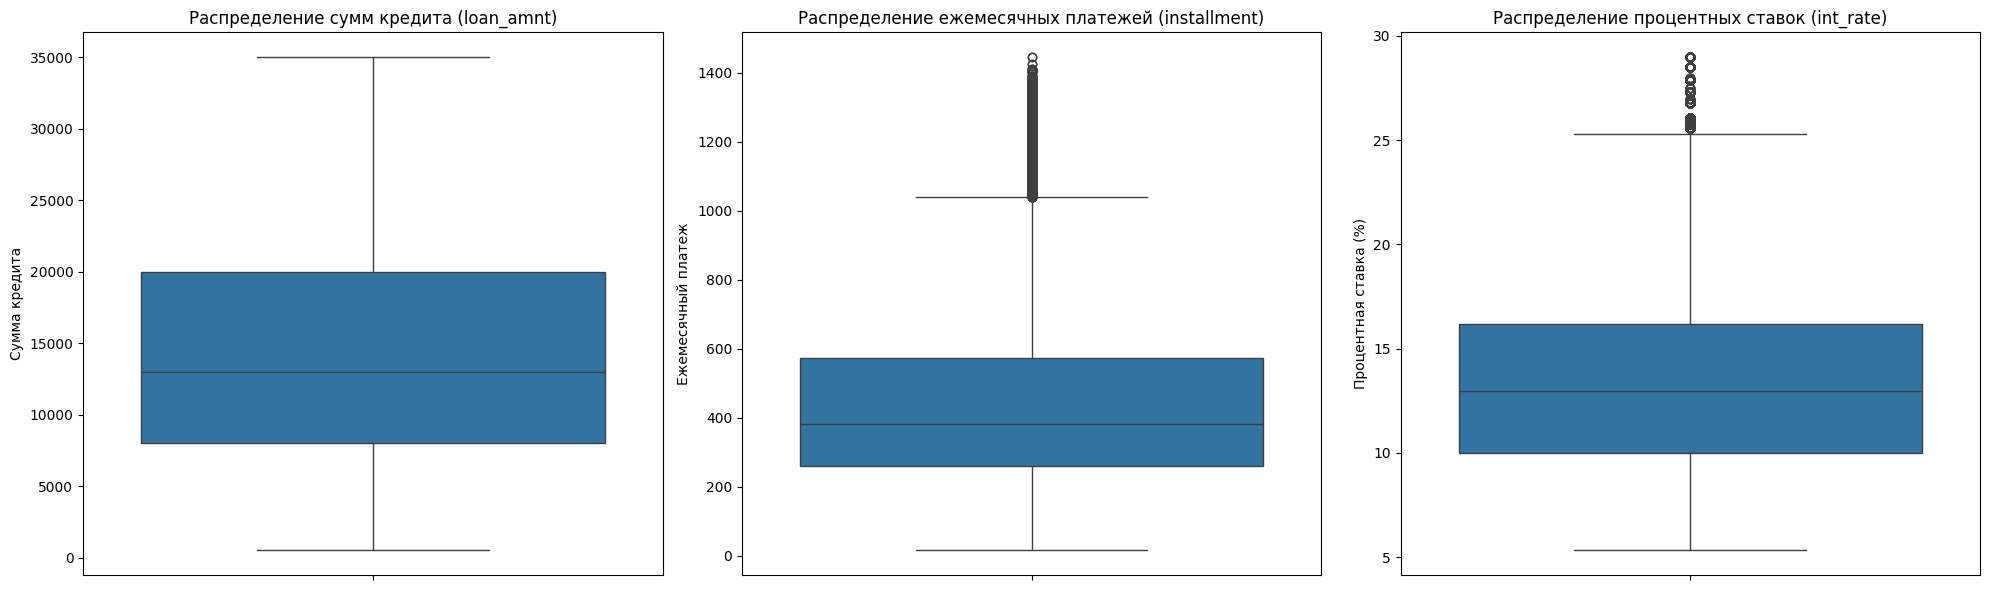

In [168]:

fig, axes = plt.subplots(1, 3, figsize=(20, 6))


sns.boxplot(data=df, y='loan_amnt', ax=axes[0])
axes[0].set_title('Распределение сумм кредита (loan_amnt)')
axes[0].set_ylabel('Сумма кредита')


sns.boxplot(data=df, y='installment', ax=axes[1])
axes[1].set_title('Распределение ежемесячных платежей (installment)')
axes[1].set_ylabel('Ежемесячный платеж')

sns.boxplot(data=df, y='int_rate', ax=axes[2])
axes[2].set_title('Распределение процентных ставок (int_rate)')
axes[2].set_ylabel('Процентная ставка (%)')

plt.tight_layout()
plt.show()



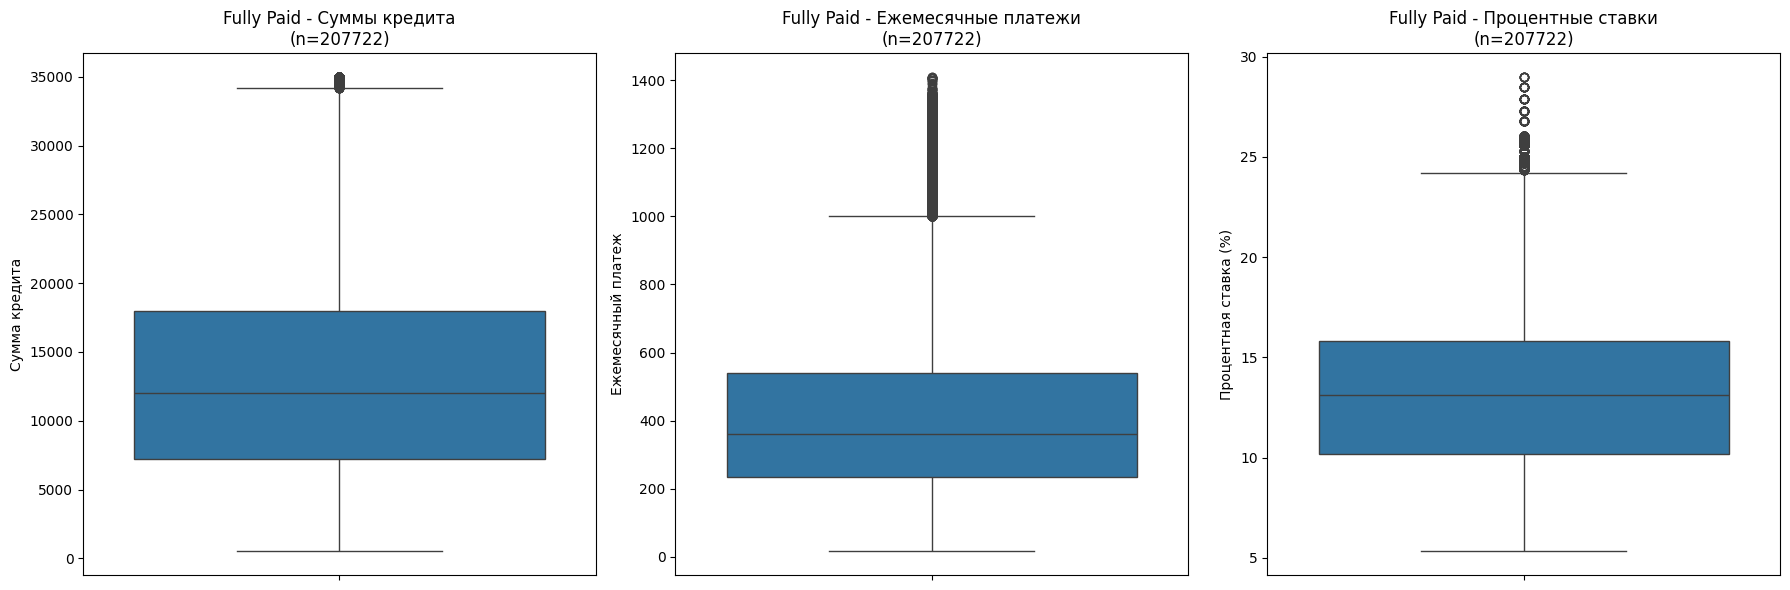

СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: Fully Paid
  loan_amnt: 6443 выбросов (3.1%)
  installment: 5917 выбросов (2.8%)
  int_rate: 2279 выбросов (1.1%)
--------------------------------------------------


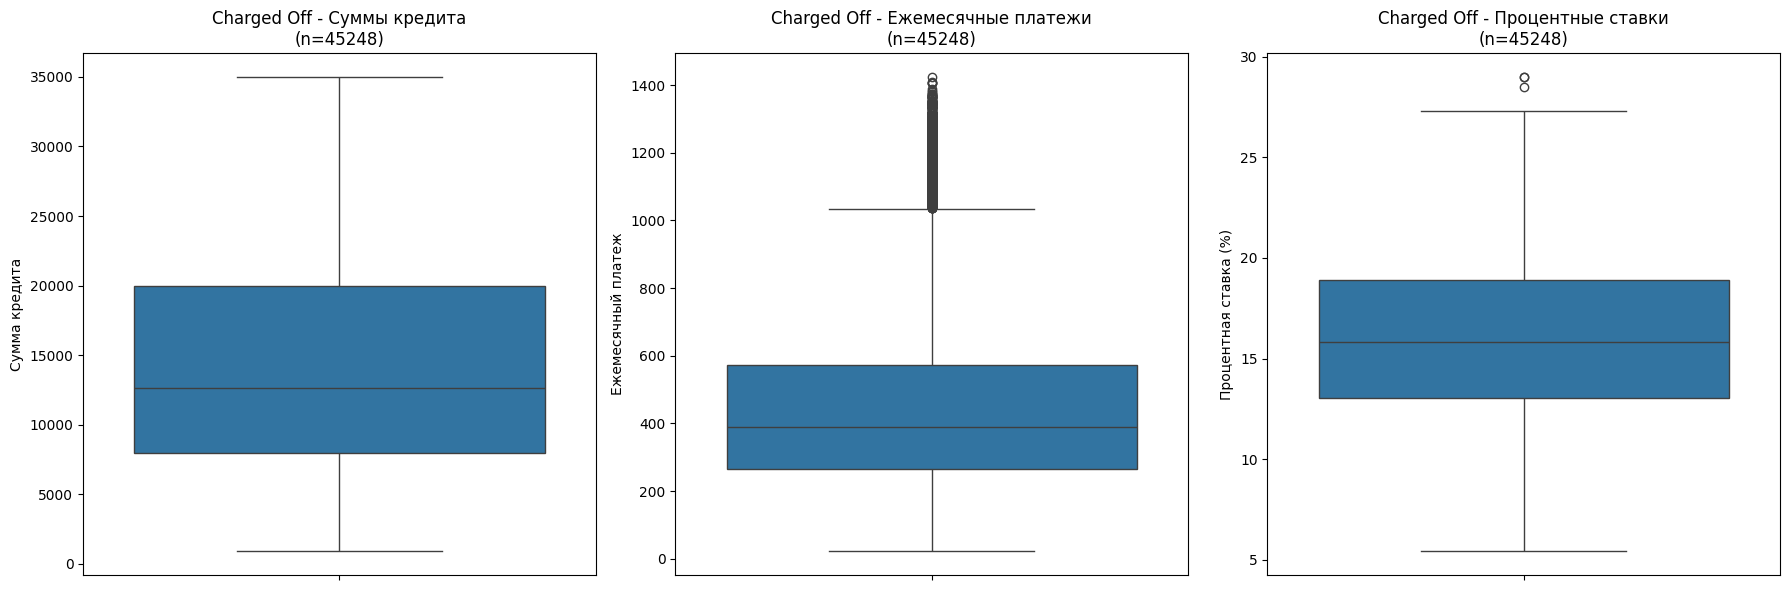

СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: Charged Off
  loan_amnt: 0 выбросов (0.0%)
  installment: 1121 выбросов (2.5%)
  int_rate: 3 выбросов (0.0%)
--------------------------------------------------


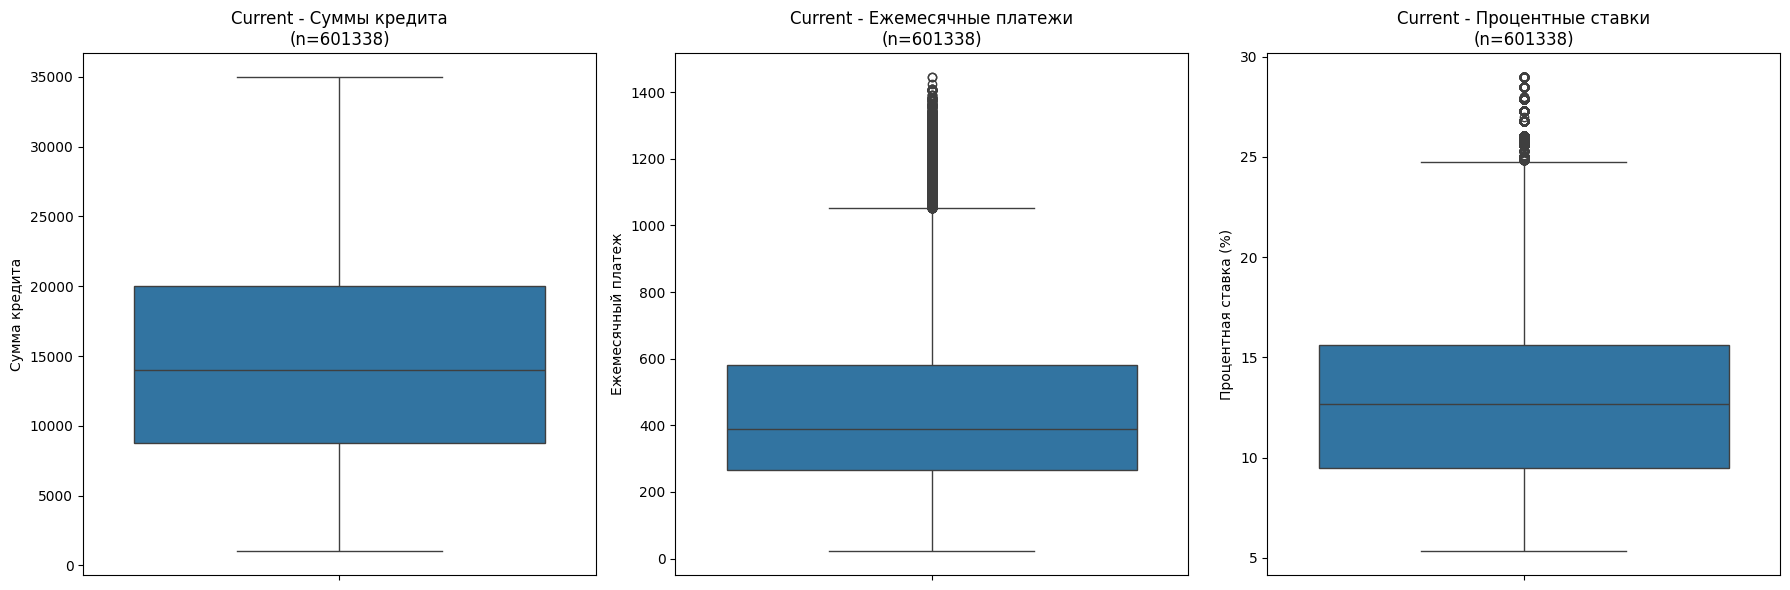

СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: Current
  loan_amnt: 0 выбросов (0.0%)
  installment: 15285 выбросов (2.5%)
  int_rate: 5879 выбросов (1.0%)
--------------------------------------------------


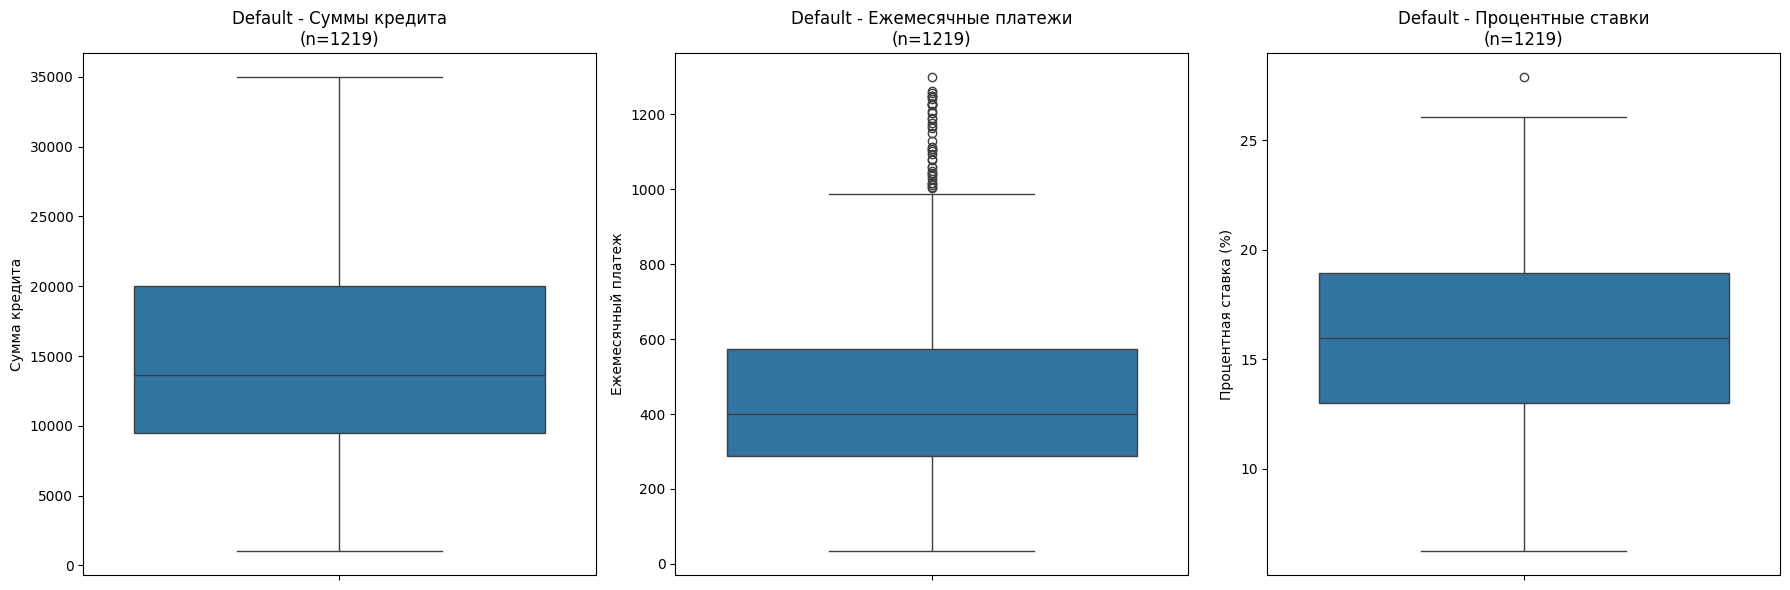

СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: Default
  loan_amnt: 0 выбросов (0.0%)
  installment: 39 выбросов (3.2%)
  int_rate: 1 выбросов (0.1%)
--------------------------------------------------


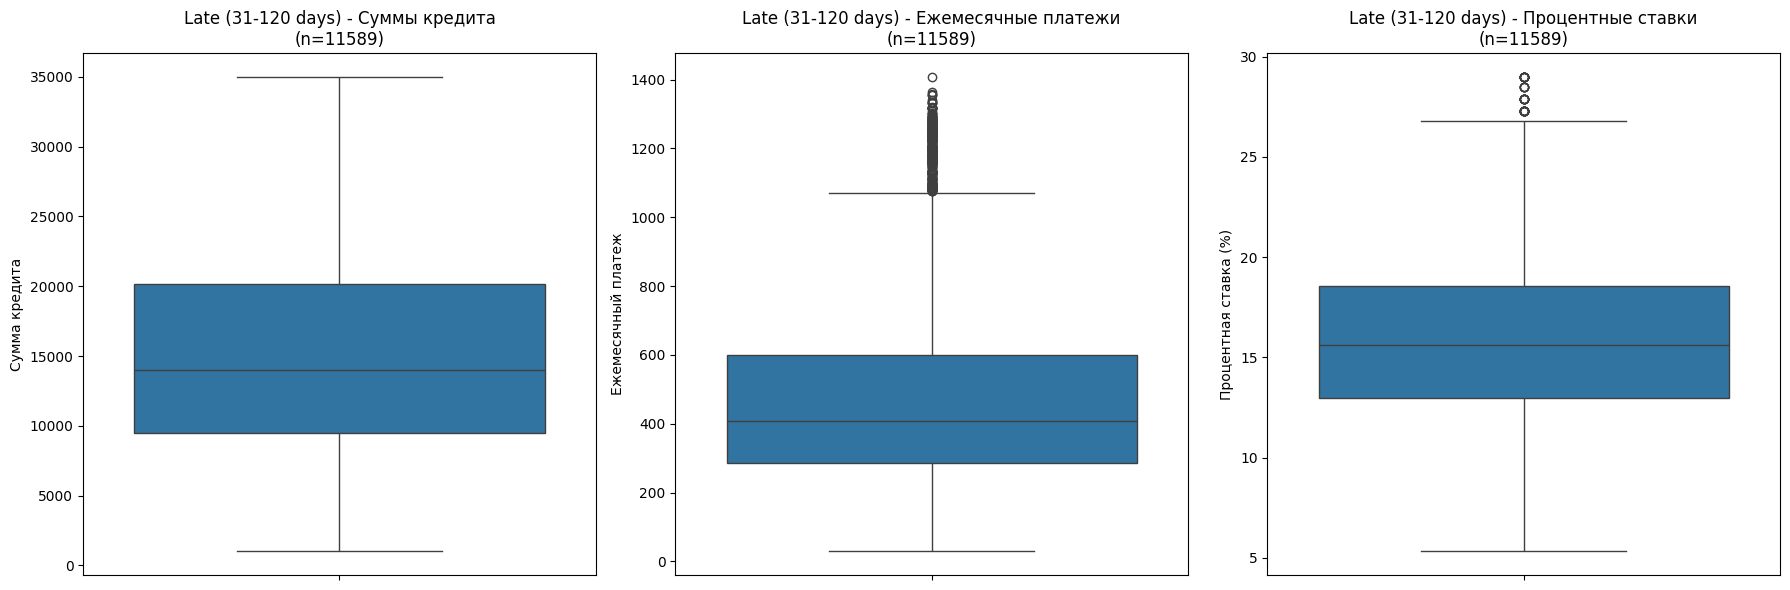

СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: Late (31-120 days)
  loan_amnt: 0 выбросов (0.0%)
  installment: 317 выбросов (2.7%)
  int_rate: 45 выбросов (0.4%)
--------------------------------------------------


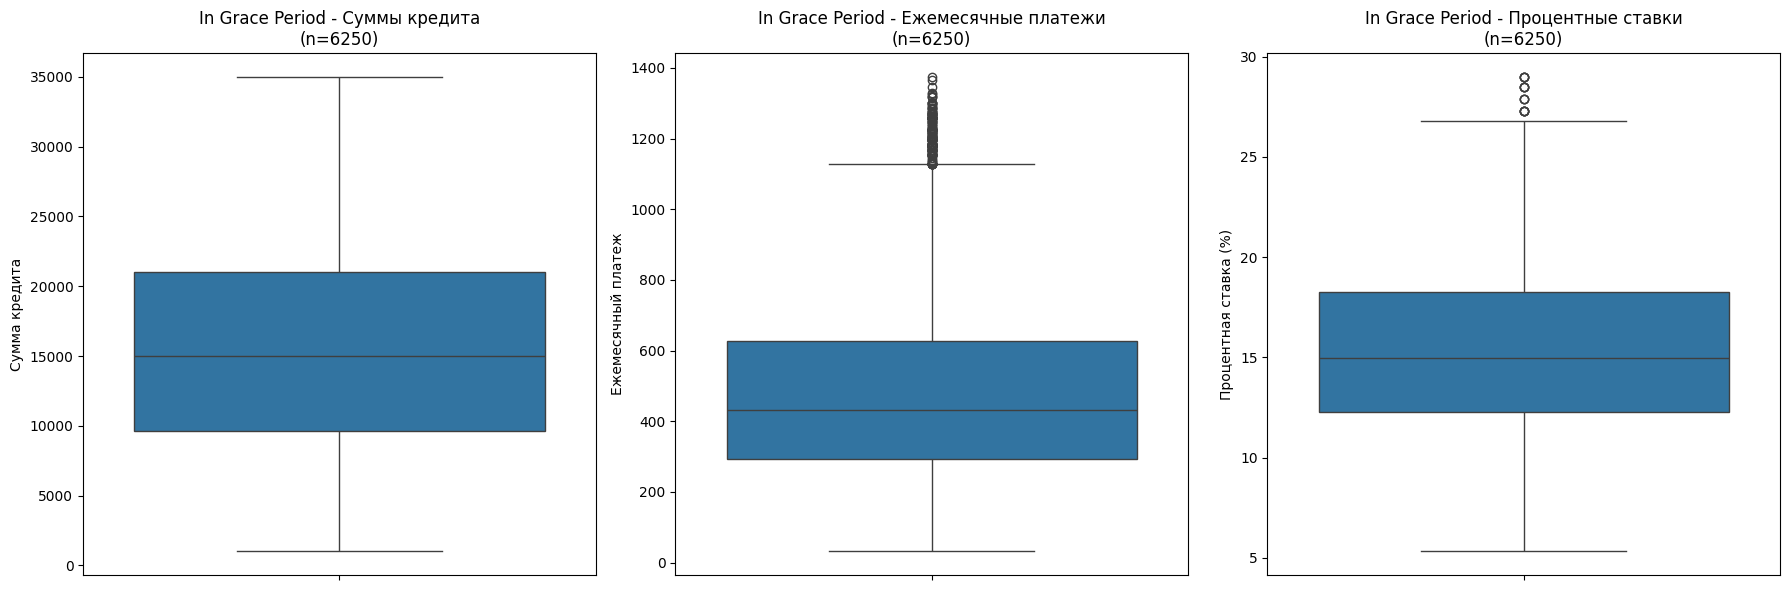

СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: In Grace Period
  loan_amnt: 0 выбросов (0.0%)
  installment: 149 выбросов (2.4%)
  int_rate: 16 выбросов (0.3%)
--------------------------------------------------


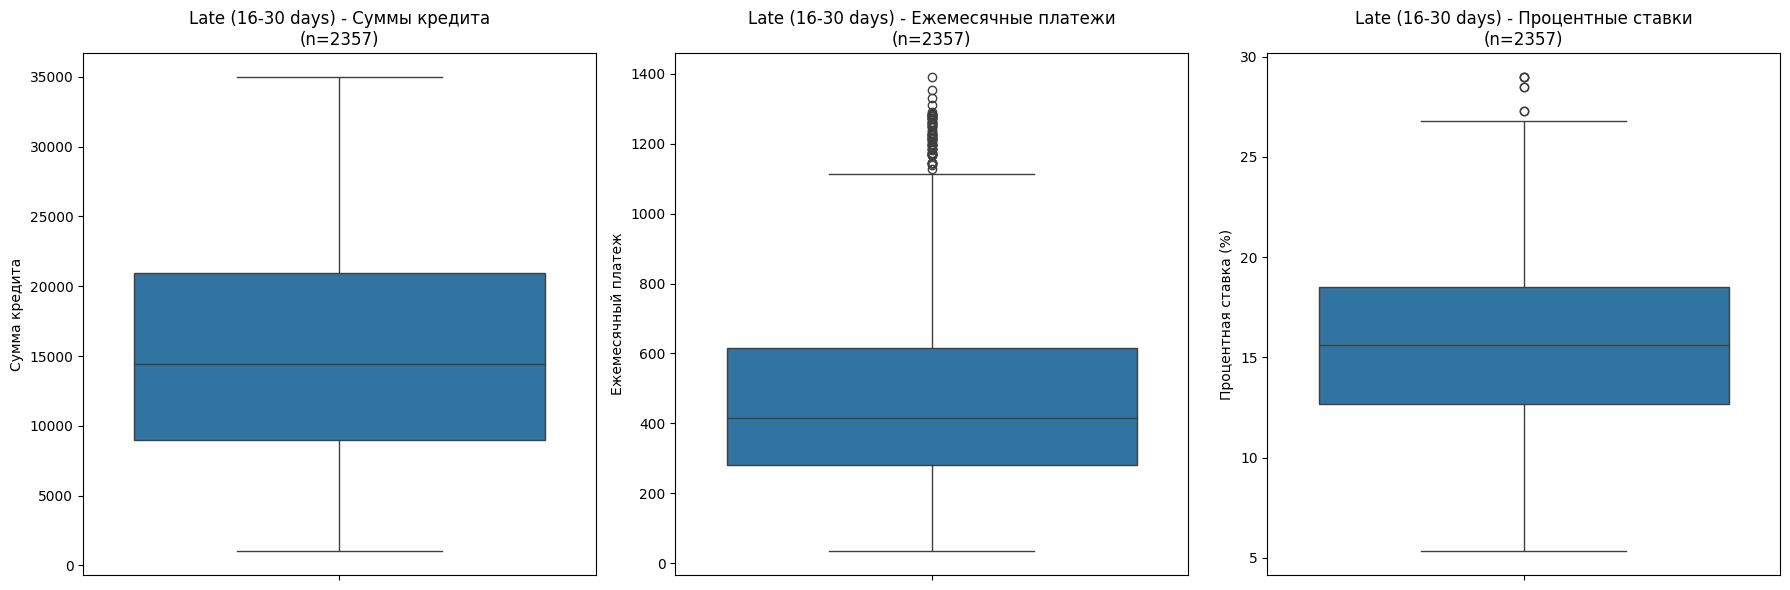

СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: Late (16-30 days)
  loan_amnt: 0 выбросов (0.0%)
  installment: 69 выбросов (2.9%)
  int_rate: 7 выбросов (0.3%)
--------------------------------------------------


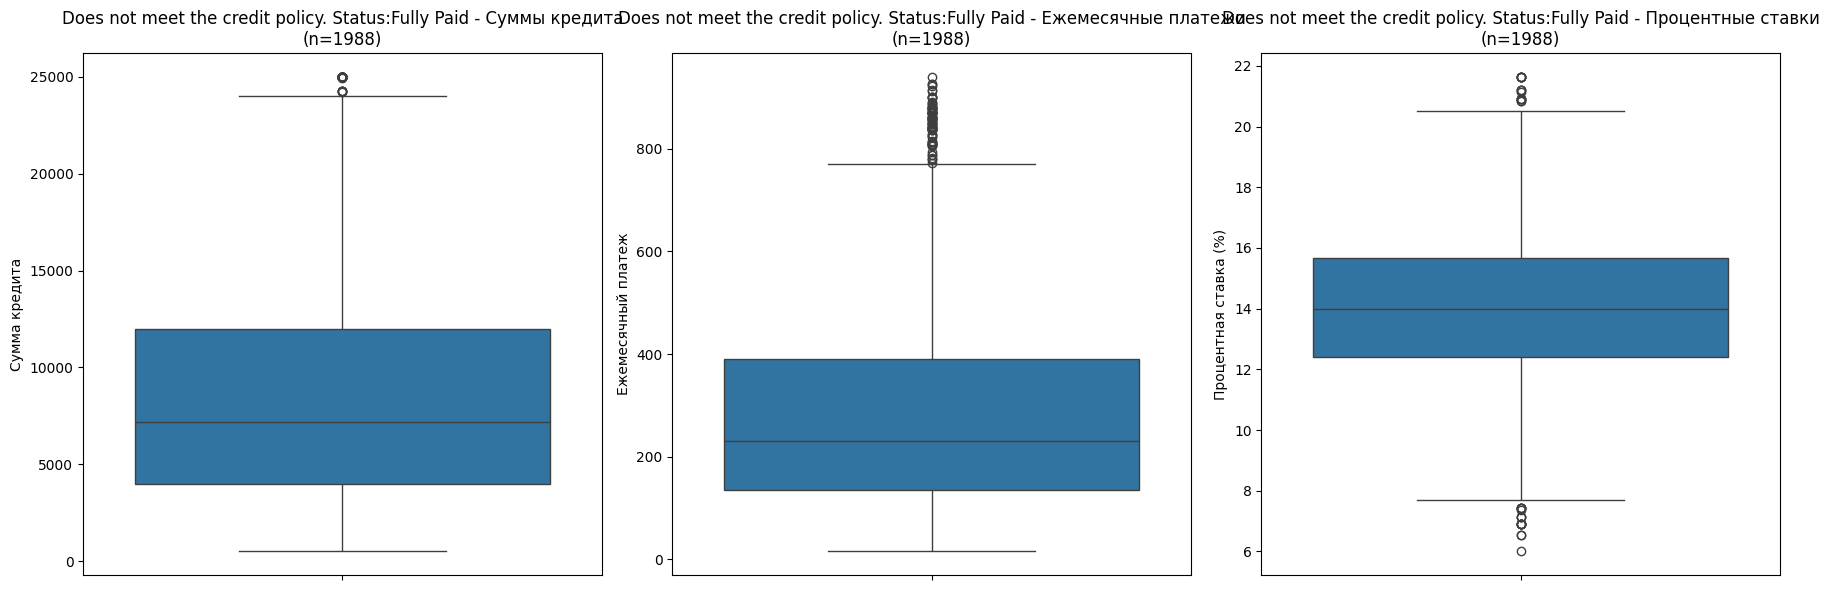

СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: Does not meet the credit policy. Status:Fully Paid
  loan_amnt: 77 выбросов (3.9%)
  installment: 80 выбросов (4.0%)
  int_rate: 35 выбросов (1.8%)
--------------------------------------------------


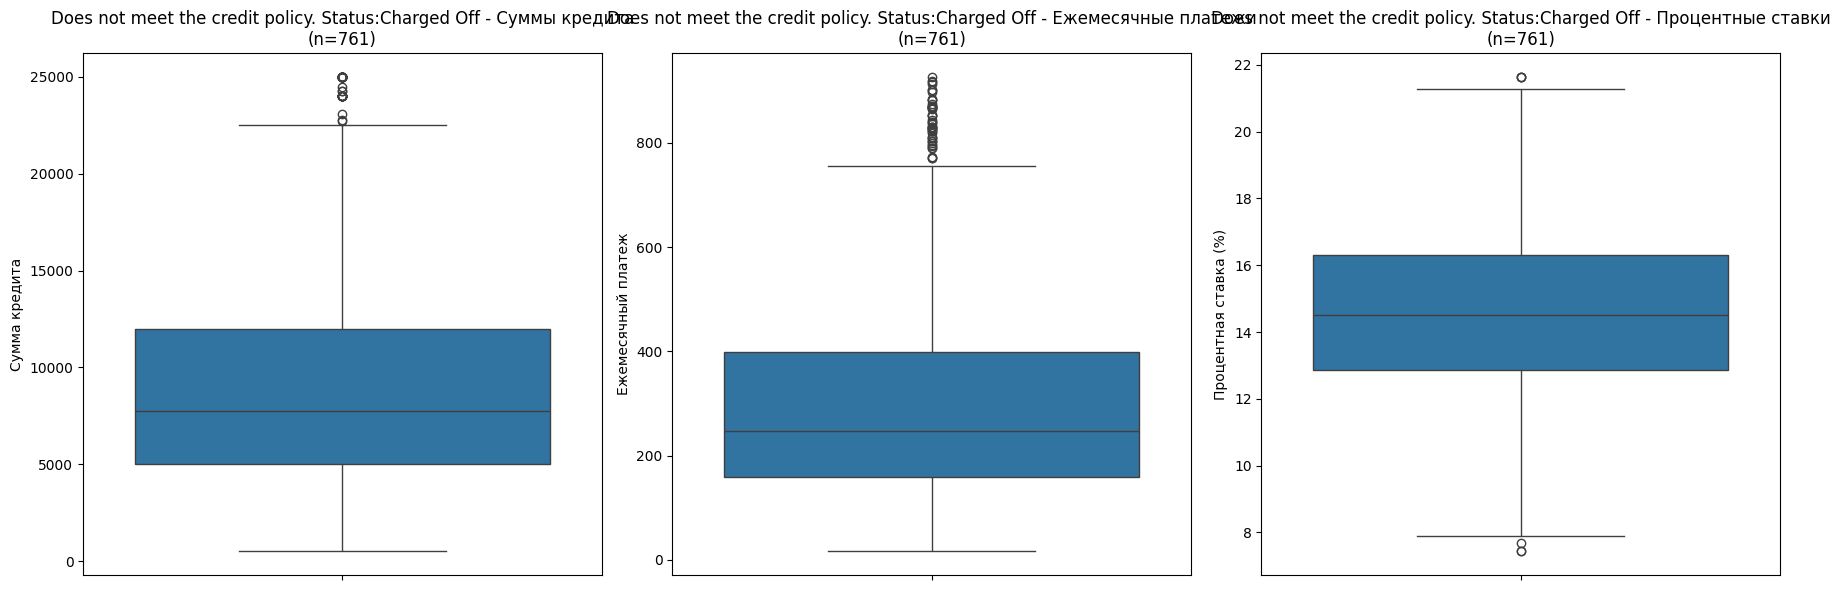

СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: Does not meet the credit policy. Status:Charged Off
  loan_amnt: 54 выбросов (7.1%)
  installment: 47 выбросов (6.2%)
  int_rate: 6 выбросов (0.8%)
--------------------------------------------------


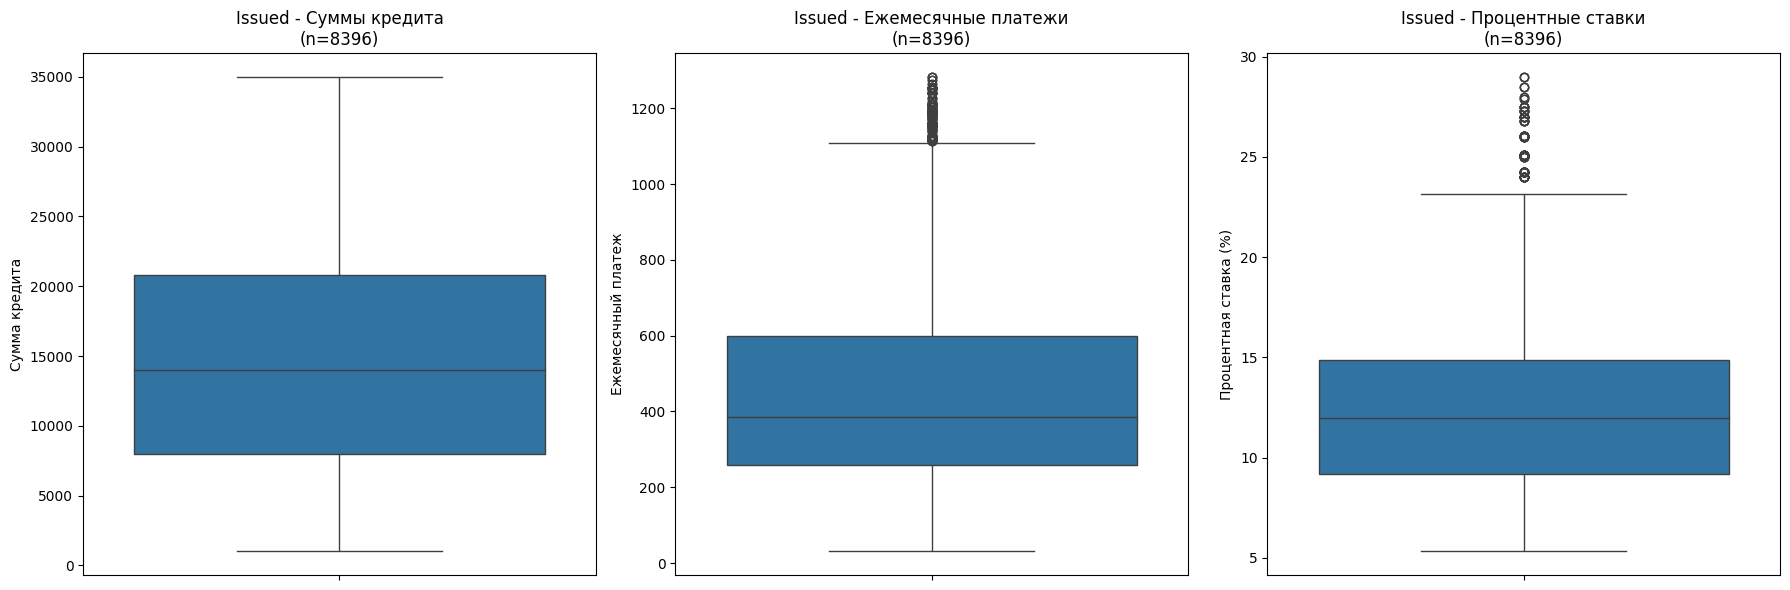

СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: Issued
  loan_amnt: 0 выбросов (0.0%)
  installment: 185 выбросов (2.2%)
  int_rate: 120 выбросов (1.4%)
--------------------------------------------------


In [169]:

unique_statuses = df['loan_status'].unique()


for status in unique_statuses:

    status_df = df[df['loan_status'] == status]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.boxplot(data=status_df, y='loan_amnt', ax=axes[0])
    axes[0].set_title(f'{status} - Суммы кредита\n(n={len(status_df)})')
    axes[0].set_ylabel('Сумма кредита')

    sns.boxplot(data=status_df, y='installment', ax=axes[1])
    axes[1].set_title(f'{status} - Ежемесячные платежи\n(n={len(status_df)})')
    axes[1].set_ylabel('Ежемесячный платеж')

    sns.boxplot(data=status_df, y='int_rate', ax=axes[2])
    axes[2].set_title(f'{status} - Процентные ставки\n(n={len(status_df)})')
    axes[2].set_ylabel('Процентная ставка (%)')

    plt.tight_layout()
    plt.show()


    print(f"СТАТИСТИКА ВЫБРОСОВ ДЛЯ СТАТУСА: {status}")
    for col in ['loan_amnt', 'installment', 'int_rate']:
        Q1 = status_df[col].quantile(0.25)
        Q3 = status_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = status_df[(status_df[col] < lower_bound) | (status_df[col] > upper_bound)]
        print(f"  {col}: {len(outliers)} выбросов ({len(outliers)/len(status_df)*100:.1f}%)")
    print("-" * 50)

In [170]:
opts = ['int_rate', 'loan_amnt', 'total_pymnt', 'total_acc']
df[opts].corr()



,int_rate,loan_amnt,total_pymnt,total_acc
int_rate,1.000000,0.144827,0.170825,-0.038620
loan_amnt,0.144827,1.000000,0.475195,0.222657
total_pymnt,0.170825,0.475195,1.000000,0.109109
total_acc,-0.038620,0.222657,0.109109,1.000000


<Axes: xlabel='loan_amnt', ylabel='total_pymnt'>

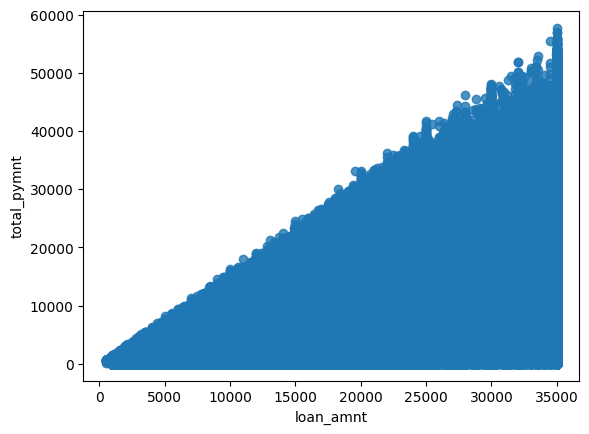

In [171]:
sns.regplot(df, y="total_pymnt", x="loan_amnt")

<Axes: xlabel='loan_amnt', ylabel='total_pymnt'>

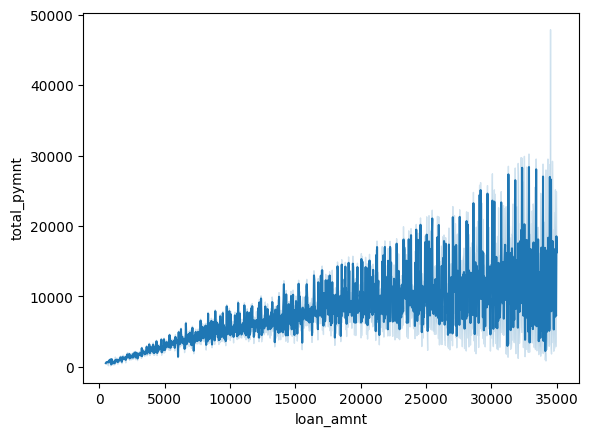

In [172]:
sns.lineplot(df, y="total_pymnt", x="loan_amnt")

<Axes: xlabel='loan_amnt', ylabel='total_pymnt'>

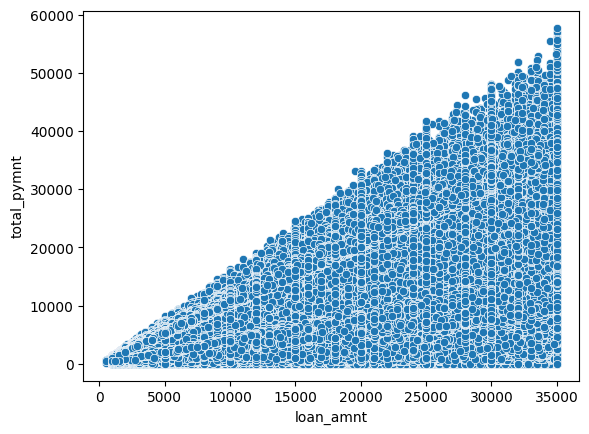

In [173]:
sns.scatterplot(df, y="total_pymnt", x="loan_amnt")